# What is the trend and factors influencing the enrolment in undergraduate programs at LSE? 


## Data Acquisition

### data from LSE course calendar for each course over the years -each year is a diff df

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def get_course_numbers(url, year):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    content = soup.find("div", attrs={"class": "right-container"})
    links = content.find_all("a", href=True)
    course_list = []
    for link in links:
        text = link.text.strip()
        if len(text) > 2:
            course_list.append(text[0:6].strip())

    service = Service("chromedriver.exe")
    driver = webdriver.Chrome(service=service)

    course_enrolment = {}

    for course in course_list:
        course_url = f"https://www.lse.ac.uk/resources/calendar{year}-{year+1}/courseGuides/{course[0:2]}/{year}_{course}.htm"
        driver.get(course_url)
        try:
            total_students = WebDriverWait(driver, 0.15).until(
                EC.presence_of_element_located((By.XPATH, "//div[@id='keyFacts-Content']/p[2]"))
            ).text
            department = course[0:2]
            course_enrolment[course] = (total_students.split(":")[-1].strip(), department)
            
        except:
            #print(f"cant find {course} in {year}")
            pass

    driver.quit()
    df = pd.DataFrame.from_dict(course_enrolment, orient="index", columns=["Enrolment", "Department"])
    return df
course_numbers_2024_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2024-2025/courseGuides/undergraduate.htm", 2024)
course_numbers_2023_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2023-2024/courseGuides/undergraduate.htm", 2023)
course_numbers_2022_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2022-2023/courseGuides/undergraduate.htm", 2022)
course_numbers_2021_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2021-2022/courseGuides/undergraduate.htm", 2021)
course_numbers_2020_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2020-2021/courseGuides/undergraduate.htm", 2020)
course_numbers_2019_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2019-2020/courseGuides/undergraduate.htm", 2019)
course_numbers_2018_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2018-2019/courseGuides/undergraduate.htm", 2018)
course_numbers_2017_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2017-2018/courseGuides/undergraduate.htm", 2017)
course_numbers_2016_df = get_course_numbers("https://www.lse.ac.uk/resources/calendar2016-2017/courseGuides/undergraduate.htm", 2016)

In [10]:
#storing here as csv so u dont need to run code
course_numbers_2024_df.to_csv('data/course_numbers_2024.csv')
course_numbers_2023_df.to_csv('data/course_numbers_2023.csv')
course_numbers_2022_df.to_csv('data/course_numbers_2022.csv')
course_numbers_2021_df.to_csv('data/course_numbers_2021.csv')
course_numbers_2020_df.to_csv('data/course_numbers_2020.csv')
course_numbers_2019_df.to_csv('data/course_numbers_2019.csv')
course_numbers_2018_df.to_csv('data/course_numbers_2018.csv')
course_numbers_2017_df.to_csv('data/course_numbers_2017.csv')
course_numbers_2016_df.to_csv('data/course_numbers_2016.csv')

 ### for data cleaning, there are a lot of courses which have missing years. so maybe use only the courses where 4 or more recorded students numbers are present and use it like that

In [12]:
course_numbers_2024_df.head(5)


,Enrolment,Department
AC102,564,AC
AC103,256,AC
AC105,115,AC
AC106,115,AC
AC205,Unavailable,AC


# data from Tableu, containing number of students per year (all in one dict) - use for dropout rates. theres no department data for this. so for data cleaning i think u have to group each one into a department manually. basically we need this data but for department too but it doesnt exist

In [82]:
import tabula # you need to first install it
import pandas as pd
import warnings
warnings.simplefilter("ignore")
student_data_dict = {}
for year in [2016,2018,2019,2020,2021,2022,2023]:
    dfs_in_list = tabula.read_pdf(f"data/student_data_{year}.pdf", pages="all")
    df = pd.concat(dfs_in_list, ignore_index=True)
    student_data_dict[year] = df

    

In [84]:
student_data_dict[2016].to_csv("Control.csv")

In [86]:
## here i think its best to use SQL to take each df (stored as values) and then maybe make different tables and then combine them using sql

## data from HEFA - clean data already. shows how many staff members in all unis

In [89]:
staff_data_dict = {}
for year in [2016,2017,2018,2019,2020,2021,2022,2023]:
    df = pd.read_csv(f"data/staff_data_{year}.csv", skiprows=14)
    staff_data_dict[year] = df



In [91]:
staff_data_dict[2018]

,UKPRN,HE Provider,"Managers, directors and senior officials",Professional occupations,Associate professional occupations,Clerical and manual occupations,Total academic staff
0,10007783.0,The University of Aberdeen,0,"1,425",5,0,"1,430"
1,10007849.0,Abertay University,0,210,5,0,215
2,10007856.0,Aberystwyth University,0,745,5,0,750
3,10000163.0,AECC University College,0,55,0,0,55
4,10000291.0,Anglia Ruskin University,10,870,20,0,900
...,...,...,...,...,...,...,...
162,10007833.0,Wrexham University,0,205,0,0,205
163,10007657.0,Writtle University College,0,100,0,0,105
164,10007713.0,York St John University,10,355,15,0,380
165,10007167.0,The University of York,0,"1,935",0,0,"1,935"


In [93]:
# extract lse from each df using sql and then make bar graph showing the trend or line plot

## data for each department offer rates

In [96]:

department_data_list_1 = tabula.read_pdf(f"data/department_offer_rates_16_to_19.pdf", pages='all',stream=True)
department_data_list_2 = tabula.read_pdf(f"data/department_offer_rates_20_to_23.pdf", pages='all',stream=True)
department_data_df_1 = department_data_list_1[0]
department_data_df_2 = department_data_list_2[0]
department_data_df_1.columns = [
    "Department", "Programme", 
    "2016_Apps", "2016_Offers", "2016_Entrants",
    "2017_Apps", "2017_Offers", "2017_Entrants",
    "2018_Apps", "2018_Offers", "2018_Entrants",
    "2019_Apps", "2019_Offers", "2019_Entrants"
]
department_data_df_2.columns = [
    "Department", "Programme", 
    "2020_Apps", "2020_Offers", "2020_Entrants",
    "2021_Apps", "2021_Offers", "2021_Entrants",
    "2022_Apps", "2022_Offers", "2022_Entrants",
    "2023_Apps", "2023_Offers", "2023_Entrants"
]


department_data_df = pd.merge(
    department_data_df_1,
    department_data_df_2,
    on=["Department", "Programme"],
    how="outer"
)
department_data_df = department_data_df.drop(index=2)

In [98]:
department_data_df.columns


Index(['Department', 'Programme', '2016_Apps', '2016_Offers', '2016_Entrants',
       '2017_Apps', '2017_Offers', '2017_Entrants', '2018_Apps', '2018_Offers',
       '2018_Entrants', '2019_Apps', '2019_Offers', '2019_Entrants',
       '2020_Apps', '2020_Offers', '2020_Entrants', '2021_Apps', '2021_Offers',
       '2021_Entrants', '2022_Apps', '2022_Offers', '2022_Entrants',
       '2023_Apps', '2023_Offers', '2023_Entrants'],
      dtype='object')

### farhaan needs to add api data from lse as well as word counts for the each word. do this for 2016,2019,2022 to see change over the years. Then we also do word counts for three other departments, maybe "lse stats", "lse economics" "lse law" to see if these departments all have the same trend or not

## complete data cleaning -dilan

In [102]:
def RemoveUnavailableCourses(dataframe):
    cleaned_df = dataframe[dataframe["Enrolment"] != "Unavailable"]
    return cleaned_df
    
course_numbers_2024_df = RemoveUnavailableCourses(course_numbers_2024_df)
course_numbers_2023_df = RemoveUnavailableCourses(course_numbers_2023_df)
course_numbers_2022_df = RemoveUnavailableCourses(course_numbers_2022_df)
course_numbers_2021_df = RemoveUnavailableCourses(course_numbers_2021_df)
course_numbers_2020_df = RemoveUnavailableCourses(course_numbers_2020_df)
course_numbers_2019_df = RemoveUnavailableCourses(course_numbers_2019_df)
course_numbers_2018_df = RemoveUnavailableCourses(course_numbers_2018_df)
course_numbers_2017_df = RemoveUnavailableCourses(course_numbers_2017_df)
course_numbers_2016_df = RemoveUnavailableCourses(course_numbers_2016_df)


NameError: name 'course_numbers_2024_df' is not defined

In [104]:
def clean_student_data(student_data):
    student_data_array = student_data.values.tolist()
    student_array = []
    x=3
    while x+1 < len(student_data_array):
        temp = []
        temp.append(student_data_array[x][0])
        first_year = 0
        second_year = 0
        final_year = 0
        total = 0
        if student_data_array[x][1] == "1st Year":
            first_year = student_data_array[x][2]
        elif student_data_array[x][1] == "2nd Year":
            second_year = student_data_array[x][2]
        elif student_data_array[x][1] == "Final Year":
            final_year = student_data_array[x][2]
        elif student_data_array[x][1] == "Total":
            total = student_data_array[x][2]
        x+=1
        while pd.isna(student_data_array[x][0]) and x < len(student_data_array)-1:
            if student_data_array[x][1] == "1st Year":
                first_year = student_data_array[x][2]
            elif student_data_array[x][1] == "2nd Year":
                second_year = student_data_array[x][2]
            elif student_data_array[x][1] == "Final Year":
                final_year = student_data_array[x][2]
            elif student_data_array[x][1] == "Total":
                total = student_data_array[x][2]
            x += 1
        temp.append(first_year)
        temp.append(second_year)
        temp.append(final_year)
        temp.append(total)
        student_array.append(temp)
    student_array.pop()
    return student_array

In [106]:
def create_df_student_data(student_data_array):
    column_names = ["Course name", "1st Year", "2nd Year", "Final Year","Total"]
    temp_df = pd.DataFrame(student_data_array,columns=column_names)
    return temp_df


In [108]:
student_data_2017 = student_data_dict[2017]
student_data_array_2017 = clean_student_data(student_data_2017)
missing_data_before = [["BSc in Accounting and Finance",136,134,114,384],["BSc in Actuarial Science",67,70,87,224],["BA in Anthropology and Law",14,15,16,45]]
missing_data_after = [["Sociology",49,33,36,118],["BSc in Statistics with Finance",3,22,21,46],["Total Undergraduate Degree Students",0,0,0,4769]]
student_data_array_2017 = missing_data_before + student_data_array_2017 + missing_data_after

KeyError: 2017

In [110]:
student_data_2018 = student_data_dict[2018]
student_data_array_2018 = clean_student_data(student_data_2018)
missing_data_before = [["BSc in Accounting and Finance",147,126,138,411],["BSc in Actuarial Science",72,68,60,200],["BA in Anthropology and Law",16,18,15,49]]
missing_data_after = [["Sociology",38,47,31,116],["BSc in Statistics with Finance",0,3,17,20],["Total Undergraduate Degree Students",0,0,0,4992]]
student_data_array_2018 = missing_data_before + student_data_array_2018 + missing_data_after

In [112]:
student_data_2019 = student_data_dict[2019]
student_data_array_2019 = clean_student_data(student_data_2019)

missing_data_before = [["BSc in Accounting and Finance",116,152,117,385],["BSc in Actuarial Science",77,68,64,209],["BA in Anthropology and Law",16,15,17,48]]
missing_data_after = [["Sociology",37,40,46,123],["BSc in Statistics with Finance",0,0,4,4],["Total Undergraduate Degree Students",0,0,0,5097]]
student_data_array_2019 = missing_data_before + student_data_array_2019 + missing_data_after

In [114]:
student_data_2020 = student_data_dict[2020]
student_data_array_2020 = clean_student_data(student_data_2020)

missing_data_before = [["BSc in Accounting and Finance",144,120,148,412],["BSc in Actuarial Science",74,76,66,216],["BA in Anthropology and Law",27,16,15,58]]
missing_data_after = [["Sociology",58,39,36,133],["Total Undergraduate Degree Students",0,0,0,5559]]
student_data_array_2020 = missing_data_before + student_data_array_2020 + missing_data_after

In [116]:
student_data_2021 = student_data_dict[2021]
student_data_array_2021 = clean_student_data(student_data_2021)

missing_data_before = [["BSc in Accounting and Finance",116,150,121,387],["BSc in Actuarial Science",81,71,68,220],["BA in Anthropology and Law",21,29,15,65]]
missing_data_after = [["Sociology",53,59,40,152],["Total Undergraduate Degree Students",0,0,0,5485]]
student_data_array_2021 = missing_data_before + student_data_array_2021 + missing_data_after

In [118]:
student_data_2022 = student_data_dict[2022]
student_data_array_2022 = clean_student_data(student_data_2022)

missing_data_before = [["BSc in Accounting and Finance",113,122,139,374],["BSc in Actuarial Science",85,71,64,220],["BA in Anthropology and Law",18,22,25,65]]
missing_data_after = [["Sociology",51,50,56,157],["Total Undergraduate Degree Students",0,0,0,5862]]
student_data_array_2022 = missing_data_before + student_data_array_2022 + missing_data_after


In [120]:
student_data_2023 = student_data_dict[2023]
student_data_array_2023 = clean_student_data(student_data_2022)

missing_data_before = [["BSc in Accounting and Finance",118,113,117,348],["BSc in Actuarial Science",64,73,64,201],["BSc in Actuarial Science (with a Placement Year)",12,0,0,12],["BA in Anthropology and Law",19,20,20,59]]
missing_data_after = [["Sociology",37,51,50,138],["Total Undergraduate Degree Students",0,0,0,5639]]
student_data_array_2023 = missing_data_before + student_data_array_2023 + missing_data_after

In [130]:

student_data_2018_df = create_df_student_data(student_data_array_2018)
student_data_2019_df = create_df_student_data(student_data_array_2019)
student_data_2020_df = create_df_student_data(student_data_array_2020)
student_data_2021_df = create_df_student_data(student_data_array_2021)
student_data_2022_df = create_df_student_data(student_data_array_2022)
student_data_2023_df = create_df_student_data(student_data_array_2023)
student_data_2020_df.head()

NameError: name 'student_data_array_2016' is not defined

In [271]:
#here we clean the data so we can use it for question 5 (visualisation)
#we want to use mean for each academic year as sometimes a new course is added so the total only represents one year ond not all concurrent years such as after the course has been out for a while
student_data = {
2018: student_data_2018_df, 2019: student_data_2019_df, 2020: student_data_2020_df, 2021: student_data_2021_df, 2022: student_data_2022_df, 2023: student_data_2023_df
}

for year, df in student_data.items():
    df['Mean'] = df[['1st Year', '2nd Year', 'Final Year']].replace(0, pd.NA).mean(axis=1).round(0) #only temporarrily fills NA columns
    df['Mean'] = df['Mean'].fillna(0).astype(int)
    df = df.iloc[:-1]
    #we are gonna want this to a whole number


In [297]:
years        = []
mean_staff_list  = []

for year, df in staff_data_dict.items():
    # 1) Clean & convert the “Total academic staff” column to numeric
    staff_series = (
        df['Total academic staff']
          .astype(str)                          # in case it’s already numeric or string
          .str.replace(',', '', regex=False)    # drop thousands-sep commas
          .astype(int)
    )
    # 2) Compute the mean
    mean_staff = staff_series.mean()
    
    years.append(year)
    mean_counts.append(mean_staff)

# 3) Build your summary DataFrame
mean_staff_df = pd.DataFrame({
    'year': years,
    'mean_staff_count': mean_counts
}).sort_values('year')

print(mean_staff_df)

#from chatgpt dont use



ValueError: All arrays must be of the same length

In [293]:
import pandas as pd

years       = []
staff_counts = []

for year, df in staff_data_dict.items():
    lse_row = df[df['HE Provider'] == "London School of Economics and Political Science"]
    total = lse_row['Total academic staff'].iloc[0]
    staff_count = int(str(total).replace(',', ''))
    years.append(year)
    staff_counts.append(staff_count)

lse_staff_df = pd.DataFrame({'year': years, 'staff_count': staff_counts}).sort_values('year')

print(lse_staff_df)

   year  staff_count
0  2016         1705
1  2017         1725
2  2018         1725
3  2019         1780
4  2020         1780
5  2021         1830
6  2022         1910
7  2023         1920


In [ ]:
department_data_df = department_data_df.drop("Programme", axis=1)
department_data_df.head()

Data we have:

* We have data from 2017-2023 for the course and students in each year
* We have data for departments applications, offers and entrants for 2016-2023
* We have data for module code and number of students studying a module
* We have staff data from 2016 to 2023

# varuns part

visualise data for ALL lse students over the years and see if there is an increase or decrease, then we can answer subquestions

 - To answer if "Are certain departments experiencing a change in student enrolment?" use cleaned data and visualise. maybe 2-3 plots. going to have to group programmes into departments, this is a bit long. but maybe theres another way of doing it idk
 - Then visualise the data that tells you how many people in each programme to explain the graph above. maybe stats had a big increase and maybe thats because ds became more popular in a certain year. maybe we can also explore why there was spiek using reddit api and wordcloud
 - 

"Is there a change in the number of applicants and offer rates from LSE"
- to answer this just visualise the data provided and see if offer rates have increased or maybe places

word cloud plus analysis displayed here for the chosen departments

- visualise staff data and compare to the total places offered each year and also look at drop out rates. drop out rates increasing in one year might mean more applicants offered a place in that department that year 

## Q5)Is there a correlation between the number of staff members and enrolment in LSE

first we look at enrolement at LSE using student data


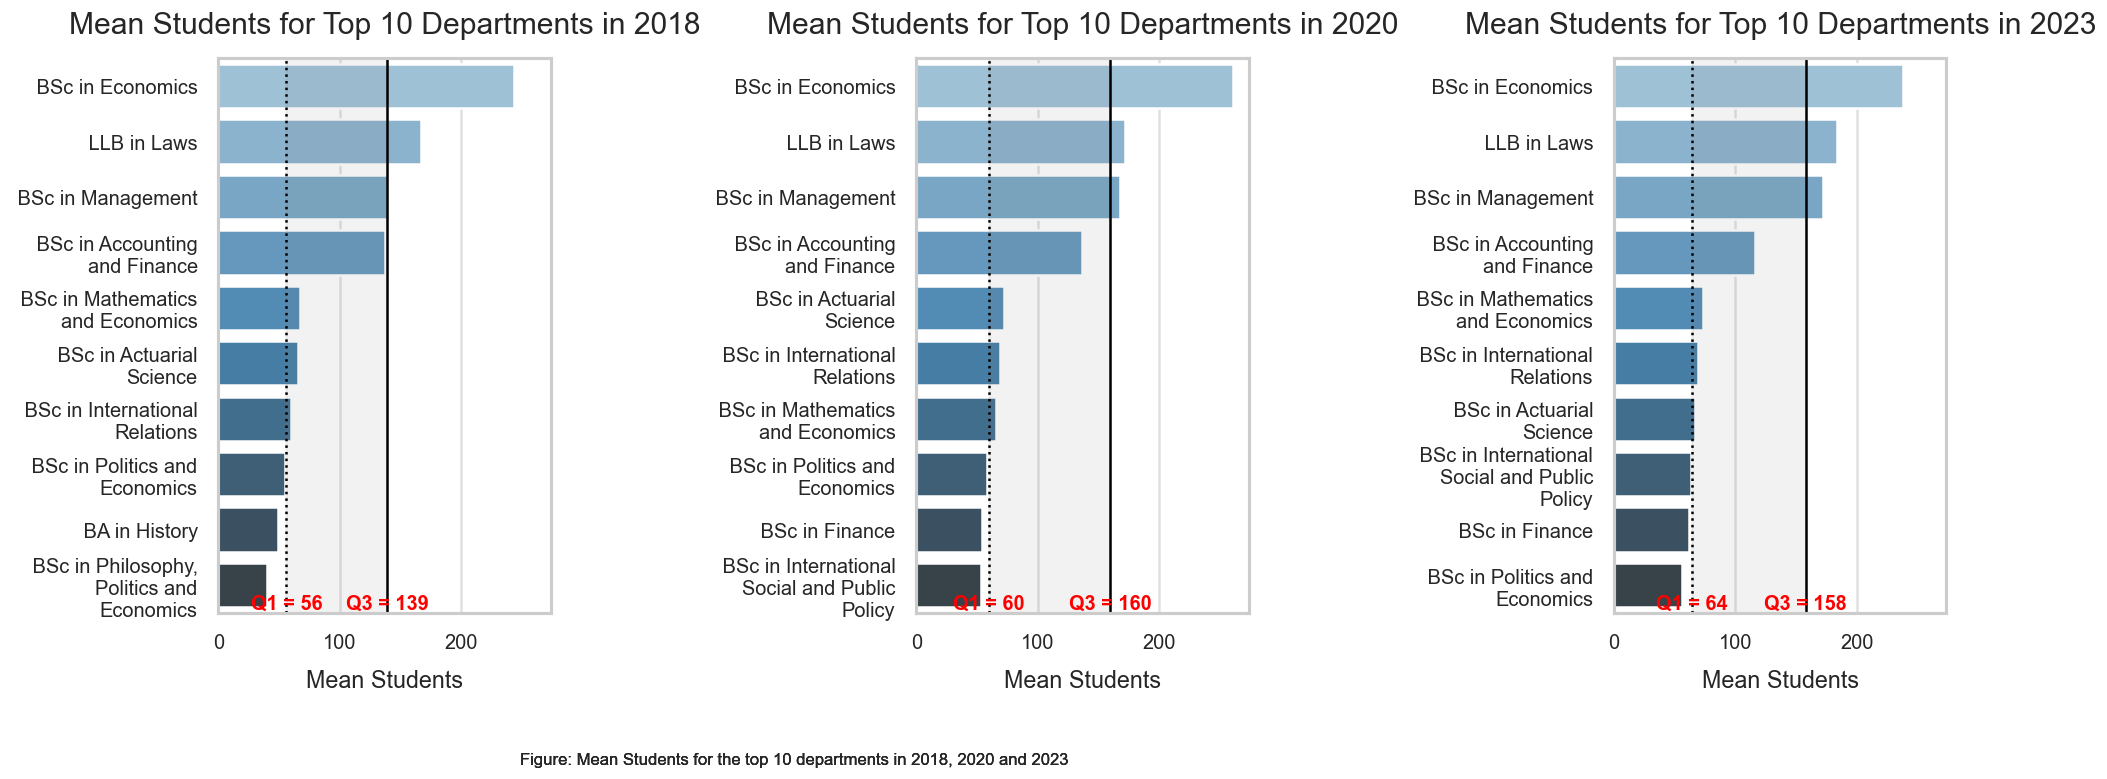

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.2)

years = [2018, 2020, 2023]


fig, axes = plt.subplots(1, 3, figsize=(24, 6), dpi=120, sharex=True)
fig.subplots_adjust(left=0.30, wspace=1.1)

def text_to_lines(department, width=20):
    words = department.split()
    lines = []
    current = ""
    for word in words:
        if len(current) + len(word) <= width:
            current += (" " + word)
        else:
            lines.append(current)
            current = word
    lines.append(current)
    department_title_lines = "\n".join(lines)
    return department_title_lines

for i, year in enumerate(years):
    df = student_data[year].sort_values('Mean', ascending=False).head(10)
    
    
    df['Course name'] = df['Course name'].apply(text_to_lines)
    
    ax = axes[i]
    sns.barplot(x='Mean', y='Course name', data=df, ax=ax, palette="Blues_d")
    q1 = int(df['Mean'].quantile(0.25).round(0))
    q3 = int(df['Mean'].quantile(0.75).round(0))
    
    ax.axvline(q1, color='black', linestyle=':', linewidth=1.5)
    ax.axvline(q3, color='black', linestyle='-',  linewidth=1.5)
    ax.axvspan(q1, q3, color='gray', alpha=0.1)
    
    min_y, _ = ax.get_ylim()
    
    ax.text(q1, min_y,f"Q1 = {q1}",ha='center', va='bottom',fontsize=12,color="red",fontweight='bold')
    ax.text(q3, min_y,f"Q3 = {q3}",ha='center', va='bottom',fontsize=12,color="red",fontweight='bold')
    
    ax.set_title(f"Mean Students for Top 10 Departments in {year}",fontsize=18,pad=15)
    ax.set_xlabel("Mean Students",fontsize=14,labelpad=10)
    ax.set_ylabel("")              
    
    ax.grid(axis='x', linestyle='-', alpha=0.6)
    ax.tick_params(axis='y', labelsize=12) 
    ax.tick_params(axis='x', labelsize=12)  
    plt.figtext(0.5, -0.1,"Figure: Mean Students for the top 10 departments in 2018, 2020 and 2023",wrap=True,fontsize=10,ha="center")
plt.show()


### now for trend in staff numbers over the years and then complete this by looking at staff data in 2018,2020 and 2023

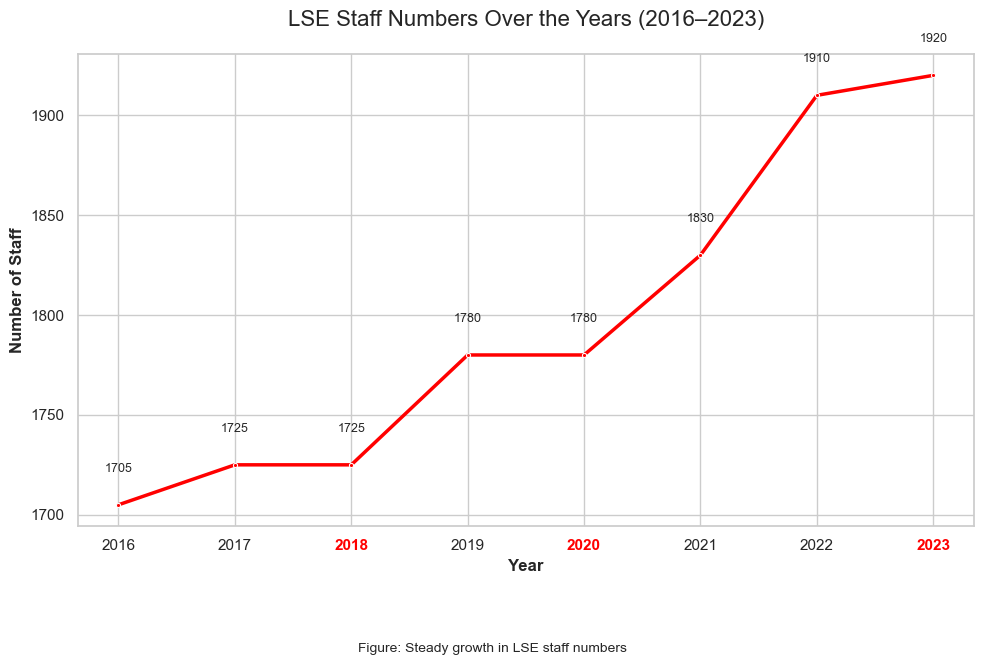

In [386]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='year', y='staff_count', data=lse_staff_df,marker = ".", linewidth=2.5,color="red")
year_count_tuple = zip(lse_staff_df['year'], lse_staff_df['staff_count'])
for x, y in year_count_tuple:
    ax.text(x, y + 15, str(y), ha='center', va='bottom', fontsize=9)
    
ax.set_title("LSE Staff Numbers Over the Years (2016–2023)", fontsize=16, pad=20)
ax.set_xlabel("Year", fontsize=12,fontweight ="bold")
ax.set_ylabel("Number of Staff", fontsize=12, fontweight ="bold")
min_y, max_Y = ax.get_ylim()
plt.figtext(0.5, -0.1,"Figure: Steady growth in LSE staff numbers",wrap=True,fontsize=10,ha="center")
for label in ax.get_xticklabels():
    if label.get_text() in ['2018', '2020', '2023']:
        label.set_color('red')    
        label.set_fontweight('bold')
plt.tight_layout()
plt.show()


In [339]:
# now for 2018,2020,2023